In [3]:
import Image_preperation as prep
import numpy as np
import matplotlib.pyplot as plt
import math
import FileManager as fm

def fit_measure(points, length, edge_img):
    
    size = len(points)
    new_points = np.empty((size,2))
    total_error = 0
    
    for i in range(size):
        print(i)
        if(i==size-1):
            p1, p2, p3 = points[i-1], points[i], points[0] 
        else:
            p1, p2, p3 = points[i-1], points[i], points[i+1]

        p2_new = strongest_edge_point_on_normal(p1, p2, p3 ,length, edge_img)
        #print(p2_new)
        #total_error += error_measure(p2, p2_new)
        new_points[i] = p2_new
        
    return new_points, total_error;   
        
def error_measure(p1, p2):
    
    x1, y1 = p1
    x2, y2 = p2
    #dist = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return math.hypot(x2 - x1, y2 - y1)
    
         
def strongest_edge_point_on_normal(a,b,c,length, edge_img):
    
    rad = get_normal_angle(a,b,c)
    points = get_points_on_angle(b, rad, length)
    edge_strength = edge_strength_at_points(points, edge_img)
    id_edge_point = np.argmax(edge_strength)
    edge_point = points[id_edge_point]

    return edge_point

def edge_strength_on_normal(a,b,c,length, edge_img):
    
    rad = get_normal_angle(a,b,c)
    points = get_points_on_angle(b, rad, length)
    return edge_strength_at_points(points, edge_img)

def is_horizontal(a,b,c):
    if(a[1] == b[1] and b[1] == c[1]):
        return True
    return False
    
def is_vertical(a,b,c):
    if(a[0] == b[0] and b[0] == c[0]):
        return True
    return False

def is_linear(b_proj , b):
    return np.array_equal(b_proj, b)

def get_normal_angle(a,b,c):
    if( is_horizontal(a,b,c) ):
        return math.pi/2
    if( is_vertical(a,b,c) ):
        return 0
    
    b_proj = project_on(b, a,c)
    
    if(is_linear(b_proj , b)):
        c_norm = np.add(c,[2,0])
        return calc_angle(a,b,c_norm)
    
    b_norm = np.add(b, [2,0])
    
    return calc_angle(b_proj, b, b_norm)

def project_on(x, a,c):
    n = np.subtract(a, c)
    n = np.divide(n, np.linalg.norm(n, 2))

    return c + n*np.dot(np.subtract(x , c), n)

def calc_angle(a,b,c):
    
    ba = np.subtract(a, b)
    bc = np.subtract(c , b)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    if(np.isnan(angle)):
        print(a)
        print(b)
        print(c)
    return angle


def get_y_point(x,rad):
    return int(np.around(math.tan(rad) * x))

def get_points_on_angle(point, rad, length):
    
    if  rad > math.pi/4:
        switched = True
        new_rad = math.pi/4 - ( rad - math.pi/4 )
    else:
        switched = False
        new_rad = rad
    
    points = np.empty((2*length+1, 2))
    for i, x in enumerate(range(-length, length+1)):
        
        y = get_y_point(x, new_rad)

        if switched:
            sub_point = [y,x] 
        else:
            sub_point = [x,y]
            
        points[i] = np.subtract(point, sub_point)
        
    return points

def edge_strength_at_points(points ,edge_img):
    
    gradient = np.empty(len(points))
    for i, p in enumerate(points):
        gradient[i] = edge_img[int(p[0]),int(p[1])]
        
    return gradient

def normalize(x):
    return x / np.linalg.norm(x)


def load_tooth(i):
    init = np.load("initial_position.npy")
    return init[0,i,:,:]/0.3

def load_tooth_of_piece():
    tooth = load_tooth(4)
    tooth_of_piece = tooth
    tooth_of_piece[:,0]=tooth[:,0]-1200
    tooth_of_piece[:,1]=tooth[:,1]-700
    return tooth_of_piece

def load_img_piece():
    img = load_image()
    return img[700:1300,1200:1800]

def show_with_points(img, points):
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.imshow(img)
    plt.plot(points[:,0], points[:,1], 'ro', markersize=2)
    plt.show()

In [2]:
if __name__ == "__main__":

    piece = fm.load_img_piece()

    tooth = fm.load_tooth_of_piece()
    points = tooth[10:13]

    fm.show_with_points(piece, points)

    piece = prep.median_filter(piece)
    edge_img = prep.edge_detection_low(piece)
    show_with_points(edge_img, points)
    a,b,c = points
    edges = edge_strength_on_normal(a,b,c,20, edge_img)

    y = np.arange(-20,21)
    plt.plot(y, normalize(edges))
    plt.show()

NameError: name 'FileManager' is not defined

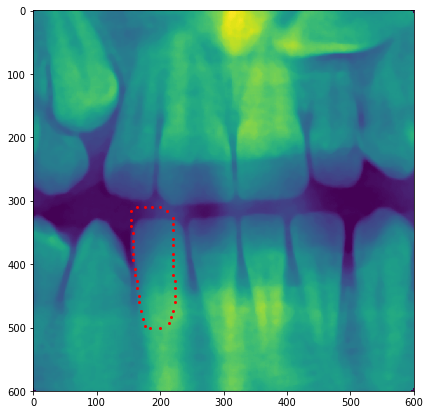

In [3]:
fm.show_with_points(piece, tooth)

In [100]:
#show_with_points(edge_img, tooth[20:23])
get_normal_angle(tooth[20],tooth[21],tooth[22])

(array([213.33333333, 493.33333333]), array([216.66666667, 483.33333333]), array([222.        , 473.33333333]))


2.9733858817327055

In [103]:
new_points, error = fit_measure(tooth, 20, edge_img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


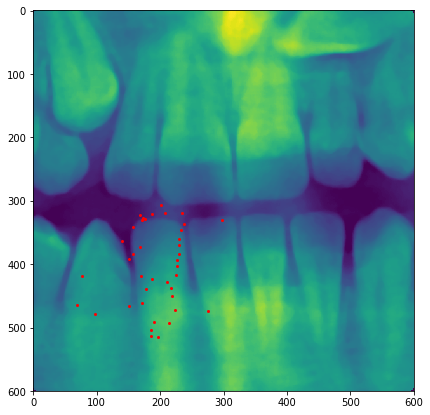

In [104]:
fm.show_with_points(piece, new_points)

In [65]:
a = np.array([[0,0],[0,1],[0,2]])
get_normal_angle(a[0],a[1],a[2])

0

In [43]:
calc_angle([1. ,0.], [1,0], [3, 0])

[0. 0.]
[2 0]
0.0
0.0
2.0
nan


C:\Users\Gebruiker\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


nan